In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sqlite3
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/Chinook.db')
df = pd.read_sql('SELECT * FROM NBA', conn).iloc[:, 1:]

In [6]:
url='https://drive.google.com/uc?id=1UGJhTd01_AmzcTnZxiySE5bOGaHkcm8h'
df = pd.read_csv(url).iloc[:, 1:]

In [7]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            10516 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

№2


In [9]:
df_unique = df.drop_duplicates(subset=['player_name', 'player_height', 'player_weight'])
X = df_unique[['player_weight']]
y = df_unique['player_height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)
y_pred = linear.predict(X)

In [12]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.6565450189413119
R2 test: 0.6241813480995454


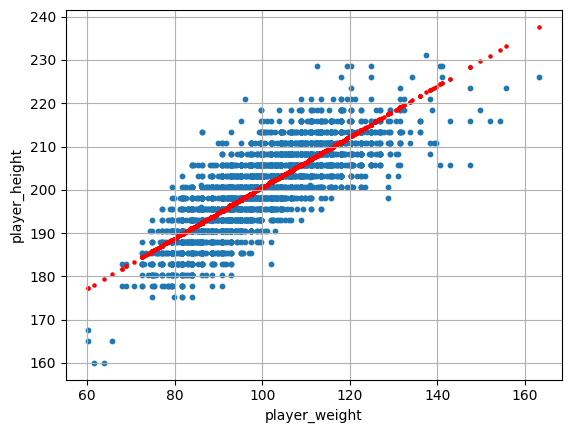

In [13]:
df_unique.plot.scatter(x="player_weight", y="player_height", s=10)
plt.scatter(X, y_pred, color = 'red', s=5)
plt.grid()
plt.show()

In [ ]:
lab = LabelEncoder()
lab.fit(y)

y_train_tr = lab.transform(y_train)
y_test_tr = lab.transform(y_test)

In [ ]:
logistic = LogisticRegression(max_iter=100000)
logistic.fit(X_train, y_train_tr)

LogisticRegression(max_iter=100000)

In [ ]:
y_train_pred_tr = logistic.predict(X_train)
y_train_pred = lab.inverse_transform(y_train_pred_tr)

y_test_pred_tr = logistic.predict(X_test)
y_test_pred = lab.inverse_transform(y_test_pred_tr)

y_pred_tr = logistic.predict(X)
y_pred = lab.inverse_transform(y_pred_tr)

In [ ]:
print('Accuracy train:', accuracy_score(y_train_tr, y_train_pred_tr))
print('Accuracy test:',  accuracy_score(y_test_tr, y_test_pred_tr))

Accuracy train: 0.1965860597439545
Accuracy test: 0.1831626848691695


In [ ]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.6629545191171234
R2 test: 0.6218533242872937


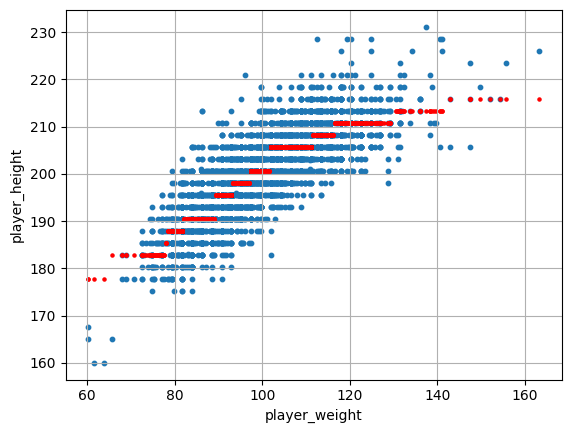

In [ ]:
df_unique.plot.scatter(x="player_weight", y="player_height", s=10)
plt.scatter(X, y_pred, color = 'red', s=5)
plt.grid()
plt.show()

In [ ]:
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_train_pred = y_pred = svm.predict(X_train)
y_test_pred = y_pred = svm.predict(X_test)
y_pred = svm.predict(X)

In [ ]:
print('R2 train:', r2_score(y_train, y_train_pred))
print('R2 test:', r2_score(y_test, y_test_pred))

R2 train: 0.6512847586545178
R2 test: 0.6448852110355602


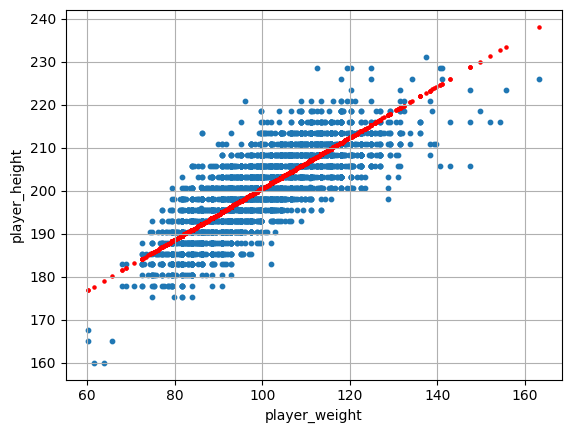

In [ ]:
df_unique.plot.scatter(x="player_weight", y="player_height", s=10)
plt.scatter(X, y_pred, color = 'red', s=5)
plt.grid()
plt.show()

№3


In [ ]:
df_10 = df[df.season == '2010-11']
X = df_10[['pts', 'reb', 'ast', 'player_height', 'player_weight']]
y = df_10['team_abbreviation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
lab = LabelEncoder()
lab.fit(y)

y_train_tr = lab.transform(y_train)
y_test_tr = lab.transform(y_test)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train_tr)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_train_pred_tr = clf.predict(X_train)
y_test_pred_tr = clf.predict(X_test)

In [ ]:
print('Accuracy train:', accuracy_score(y_train_tr, y_train_pred_tr))
print('Accuracy test:', accuracy_score(y_test_tr, y_test_pred_tr))

Accuracy train: 1.0
Accuracy test: 0.03296703296703297


№4


In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
df._get_numeric_data().corr()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.008954,0.058544,0.055218,0.008118,0.035623,0.090209,0.091746,-0.057147,0.018330,-0.119416,0.025175,0.066766
player_height,-0.008954,1.000000,0.825421,0.002202,-0.056564,0.423275,-0.449033,-0.002877,0.589485,0.614963,-0.104714,0.072154,-0.614631
player_weight,0.058544,0.825421,1.000000,0.019652,-0.026664,0.437930,-0.378784,0.004043,0.600643,0.607045,-0.067385,0.068142,-0.529440
gp,0.055218,0.002202,0.019652,1.000000,0.539066,0.470948,0.385836,0.253262,-0.016396,0.067266,0.146806,0.375816,0.133982
pts,0.008118,-0.056564,-0.026664,0.539066,1.000000,0.624889,0.660949,0.218366,-0.123674,0.054804,0.638853,0.376571,0.332815
reb,0.035623,0.423275,0.437930,0.470948,0.624889,1.000000,0.241018,0.190940,0.407976,0.612226,0.230552,0.314569,-0.069771
ast,0.090209,-0.449033,-0.378784,0.385836,0.660949,0.241018,1.000000,0.165098,-0.340600,-0.198130,0.392533,0.176083,0.802527
net_rating,0.091746,-0.002877,0.004043,0.253262,0.218366,0.190940,0.165098,1.000000,0.060166,0.051433,0.018866,0.316474,0.066176
oreb_pct,-0.057147,0.589485,0.600643,-0.016396,-0.123674,0.407976,-0.340600,0.060166,1.000000,0.556096,-0.099069,0.061805,-0.428527
dreb_pct,0.018330,0.614963,0.607045,0.067266,0.054804,0.612226,-0.198130,0.051433,0.556096,1.000000,-0.012817,0.107036,-0.325083


In [ ]:
X = df[['player_height', 'player_weight']]
y = df['draft_round']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
lab = LabelEncoder()
lab.fit(y)

y_train_tr = lab.transform(y_train)
y_test_tr = lab.transform(y_test)
y_tr = lab.transform(y)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train_tr)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_train_pred_tr = clf.predict(X_train)
y_test_pred_tr = clf.predict(X_test)

In [ ]:
print('Accuracy train:', accuracy_score(y_train_tr, y_train_pred_tr))
print('Accuracy test:', accuracy_score(y_test_tr, y_test_pred_tr))

Accuracy train: 0.6665989435188947
Accuracy test: 0.6363266964648517
